<center><h1>Comparer des outils</h1></center>

Même si vous ne les utilisez pas encore vous-même, sachez que tous les outils ne se valent pas, et qu'il faut prendre le temps d'en utiliser plusieurs.<br>
Ici nous allons utiliser <b>pie</b> et <b>cltk</b>. Et voir les différences pour un même texte.

<h2>I. Commençons par <b>pie</b></h2>

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
from typing import List

In [2]:
from pie_extended.cli.utils import get_tagger, get_model, download

Ici on va d'abord devoir télécharger les modèles d'entraînement pour que le lemmatiseur fonctionne. Mettez "False" à la place de "True" si vous avez déjà téléchargé le modèle.

In [3]:
do_download = True
if do_download:
    for dl in download("lasla"):
        x = 1

[████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████]
[████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████]
[██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]
[██████████████████████████████

Ensuite, on va demander au lemmatiseur de se paramétrer, et d'utiliser le modèle que l'on vient de télécharger.

In [4]:
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)

Enfin, on va lui donner un texte à analyser, en l'occurrence le chant I de l'<i>Odyssée</i>.

In [5]:
base_string=open("./texts/aen1.txt").read()
sentences: List[str] = [base_string]

Maintenant le vrai travail d'analyse commence. Voilà comment pie analyse le grec.

In [6]:
from pie_extended.models.grc.imports import get_iterator_and_processor
dictionary=list()
for sentence_group in sentences:
    iterator, processor = get_iterator_and_processor()
    for form in tagger.tag_str(sentence_group, iterator=iterator, processor=processor):
        #form is a dictionary, you can call the value you want by key.
        dictionary.append({"form": form['form'], 'lemma': form["lemma"], 'pos': form["pos"]})

In [7]:
print(len(dictionary))
print(dictionary[1])

6163
{'form': ':', 'lemma': '2', 'pos': 'INJ'}


On va maintenant voir quelles sont les stats de base qu'on en tire : combien de verbes, combien d'adjectifs etc.

In [8]:
nouns=0
propers=0
vbs=0
adjs=0
conjs=0
    
for element in dictionary :
    if element['pos'] == "NOMpro":
        propers+=1
    elif "NOM" in element['pos']:
        nouns+=1
    elif "VER" in element['pos']:
        vbs+=1
    elif "ADJ" in element['pos']:
        adjs+=1
    elif "CON" in element['pos']:
        conjs+=1

In [9]:
total_len=nouns+vbs+adjs+conjs+propers
nNames=(nouns*100)/total_len
nVerbs=(vbs*100)/total_len
nAdjectives=(adjs*100)/total_len
nConj=(conjs*100)/total_len
nPropers=(propers*100)/total_len
parts=[nNames,nVerbs,nConj,nAdjectives,nPropers]

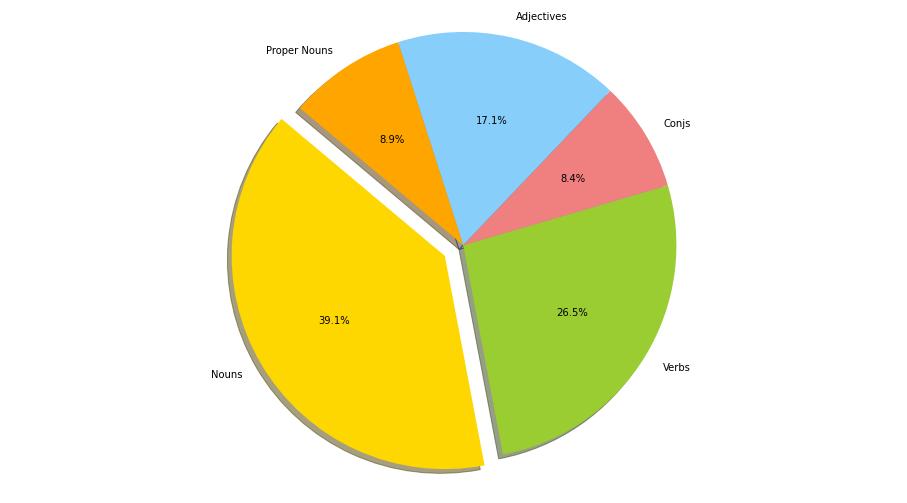

In [10]:
labels = 'Nouns','Verbs','Conjs','Adjectives','Proper Nouns'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0,0,0 )
plt.pie(parts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()